In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parseStr = lambda x: x.isalpha() and x or x.isdigit() and int(x) or x.isalnum() and\
x or len(set(string.punctuation).intersection(x)) == 1 and x.count('.') == 1 and float(x) or x

In [3]:
d = 3
G = 3
q_range = [0, 0.2, 0.4, 0.6, 0.8]

In [4]:
deltas = np.arange(0,0.4,0.001)
deltas_tick = [0.1,0.15,0.2,0.25,0.3,0.35,0.4]
q_str = ['{:.1f}'.format(q) for q in q_range] # q會跑哪些值

In [5]:
alpha_d_lines = []
alpha_2d_lines = []
beta_Gd_lines = []
beta_2Gd_lines = []
gamma_lines = []

In [6]:
for q in [0, 0.2, 0.4, 0.6, 0.8]:
    alpha_d_q = []
    alpha_2d_q = []
    beta_Gd_q = []
    beta_2Gd_q = []
    gamma_q = []
    for delta in deltas:
        alpha_d = [delta]
        alpha_2d = [delta]
        beta_Gd = [0]
        beta_2Gd = [0]
        gamma = [1 - (2/3)*np.power(delta, d) - (1/3)*np.power(delta, 2*d)]
        
        for i in range(1,100):
            bGd = 1-np.power(1-(1-q)*alpha_d[i-1]/2-(1+q)*alpha_2d[i-1]/2, G*d-1)
            b2Gd = 1-np.power(1-(1+q)*alpha_d[i-1]/2-(1-q)*alpha_2d[i-1]/2, 2*G*d-1)
            beta_Gd.append(bGd)
            beta_2Gd.append(b2Gd)
    
            ad = delta*np.power( ((1-q)*beta_Gd[i] + (1+q)*beta_2Gd[i])/2, d-1)
            a2d = delta*np.power( ((1+q)*beta_Gd[i] + (1-q)*beta_2Gd[i])/2, 2*d-1)
            alpha_d.append(ad)
            alpha_2d.append(a2d)
    
            y = 1 - delta*(2/3)*np.power(beta_Gd[i]*(1-q)/2 + beta_2Gd[i]*(1+q)/2, d) -\
                    delta*(1/3)*np.power(beta_Gd[i]*(1+q)/2 + beta_2Gd[i]*(1-q)/2, 2*d)
            gamma.append(y)
        
        alpha_d_q.append(alpha_d[-1])
        alpha_2d_q.append(alpha_2d[-1])
        beta_Gd_q.append(beta_Gd[-1])
        beta_2Gd_q.append(beta_2Gd[-1])
        gamma_q.append(gamma[-1])
        
    alpha_d_lines.append(alpha_d_q)
    alpha_2d_lines.append(alpha_2d_q)
    beta_Gd_lines.append(beta_Gd_q)
    beta_2Gd_lines.append(beta_2Gd_q)
    gamma_lines.append(gamma_q)

In [7]:
metrics = [alpha_d_lines, alpha_2d_lines, beta_Gd_lines, beta_2Gd_lines, gamma_lines]
metrics_str = ['ad_limit', 'a2d_limit', 'bd_limit', 'b2d_limit', 'gamma']
metrics_LaTeX = [r'$\lim_{i\to\infty}\alpha_d^{(i)}$',
                 r'$\lim_{i\to\infty}\alpha_{2d}^{(i)}$', 
                 r'$\lim_{i\to\infty}\beta_d^{(i)}$', 
                 r'$\lim_{i\to\infty}\beta_{2d}^{(i)}$', 
                 r'$\lim_{i\to\infty}\gamma^{(i)}$']

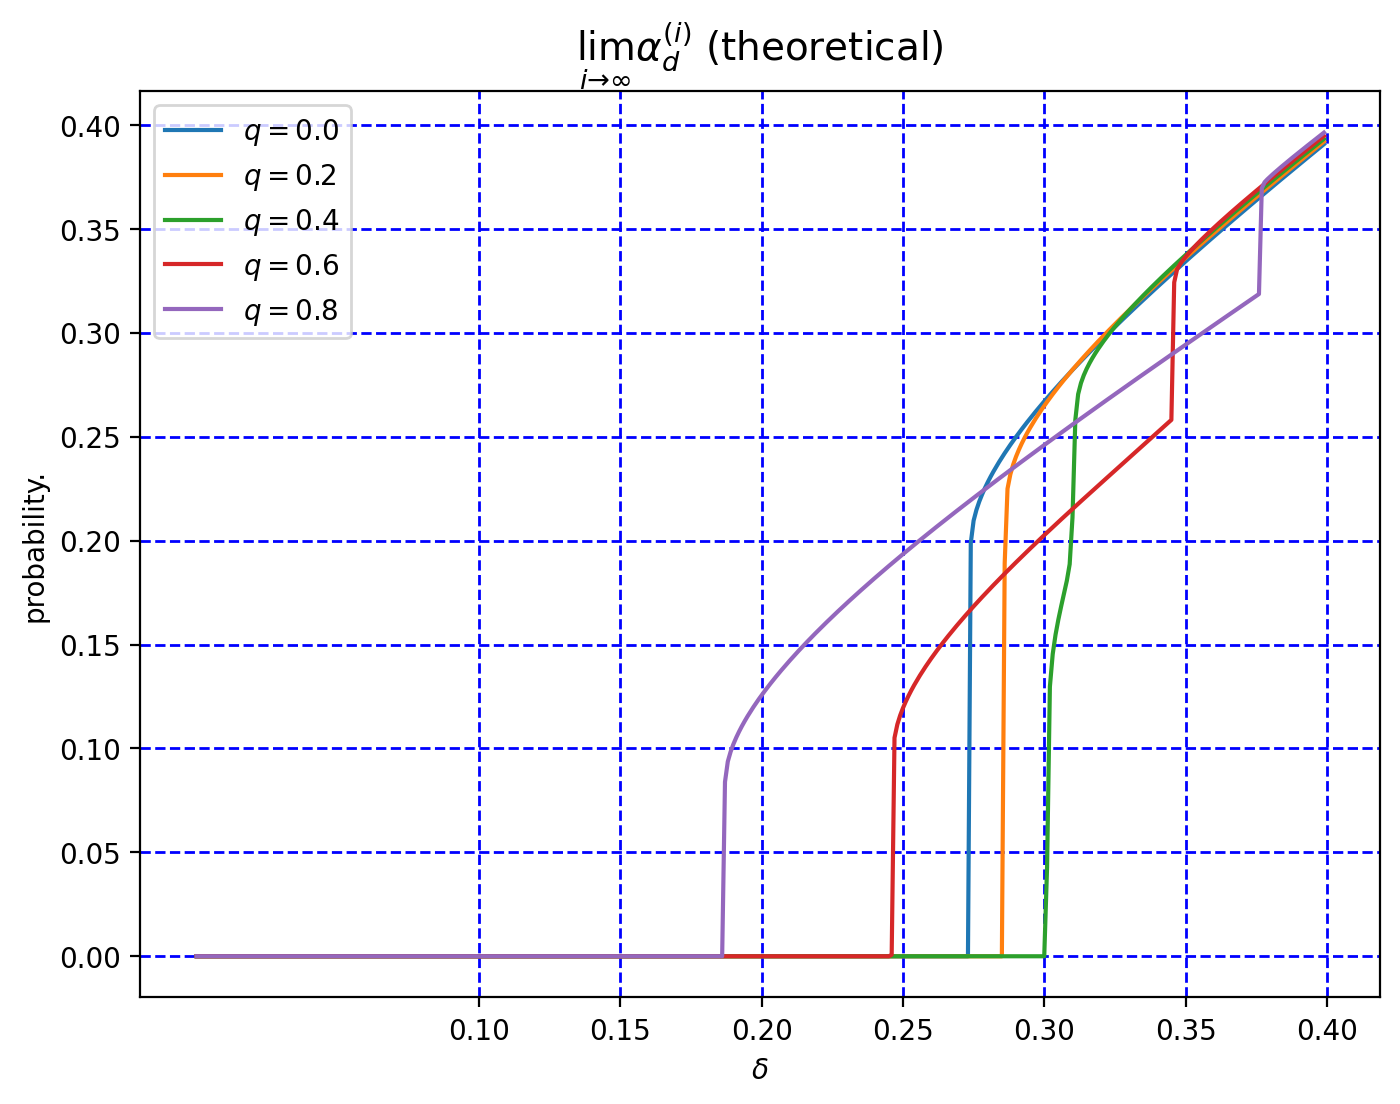

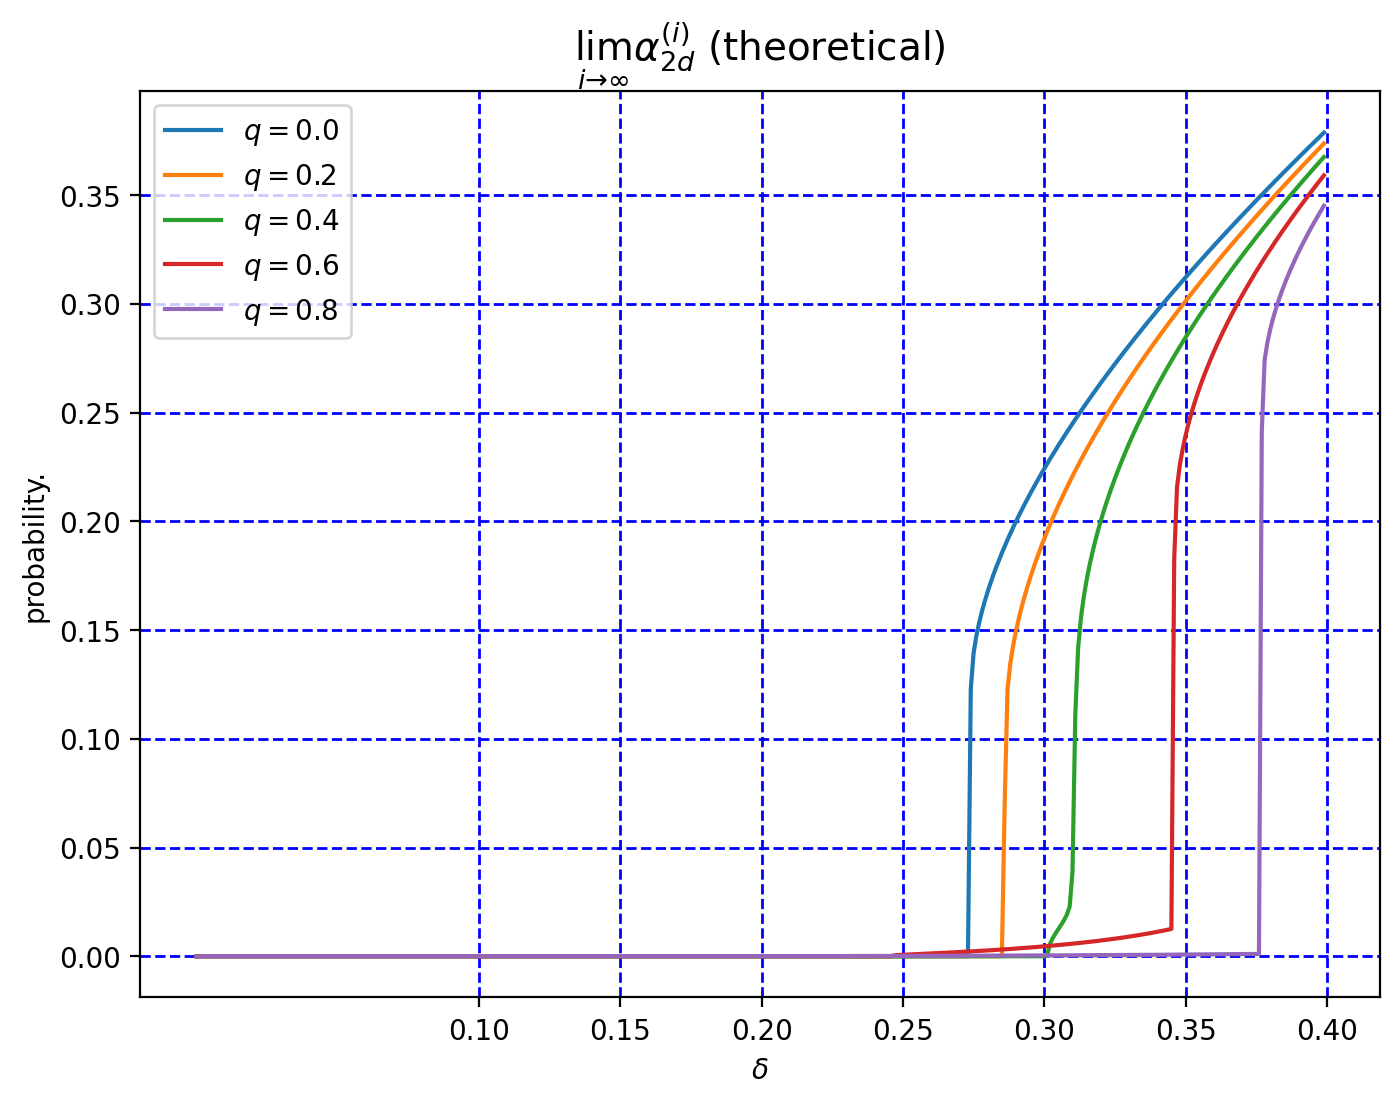

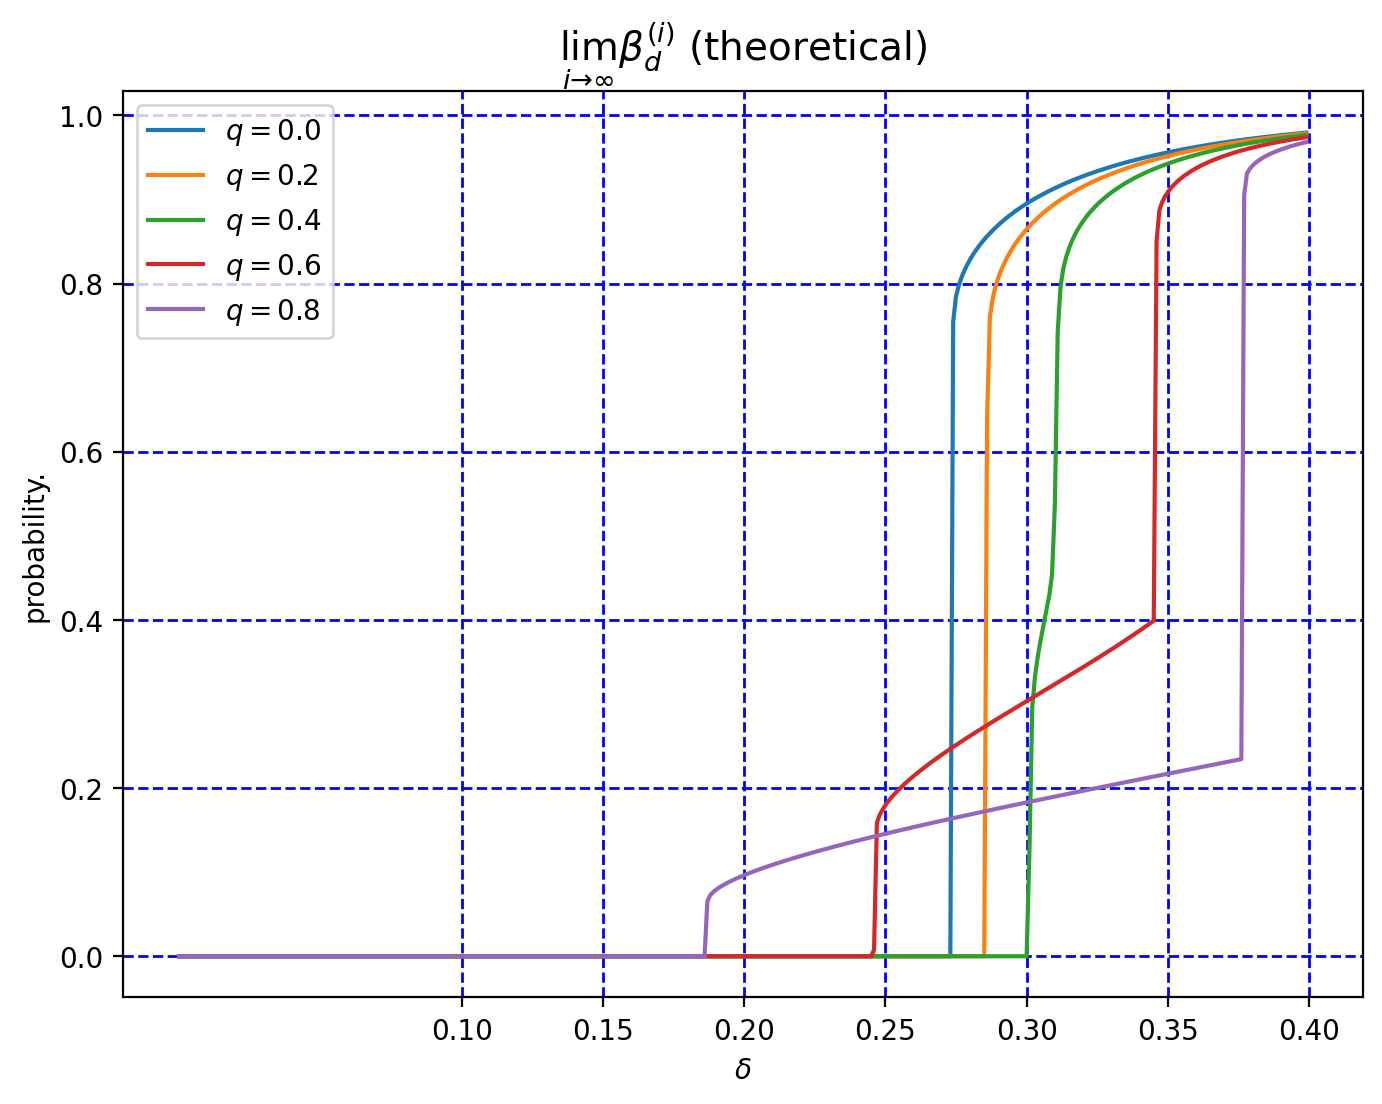

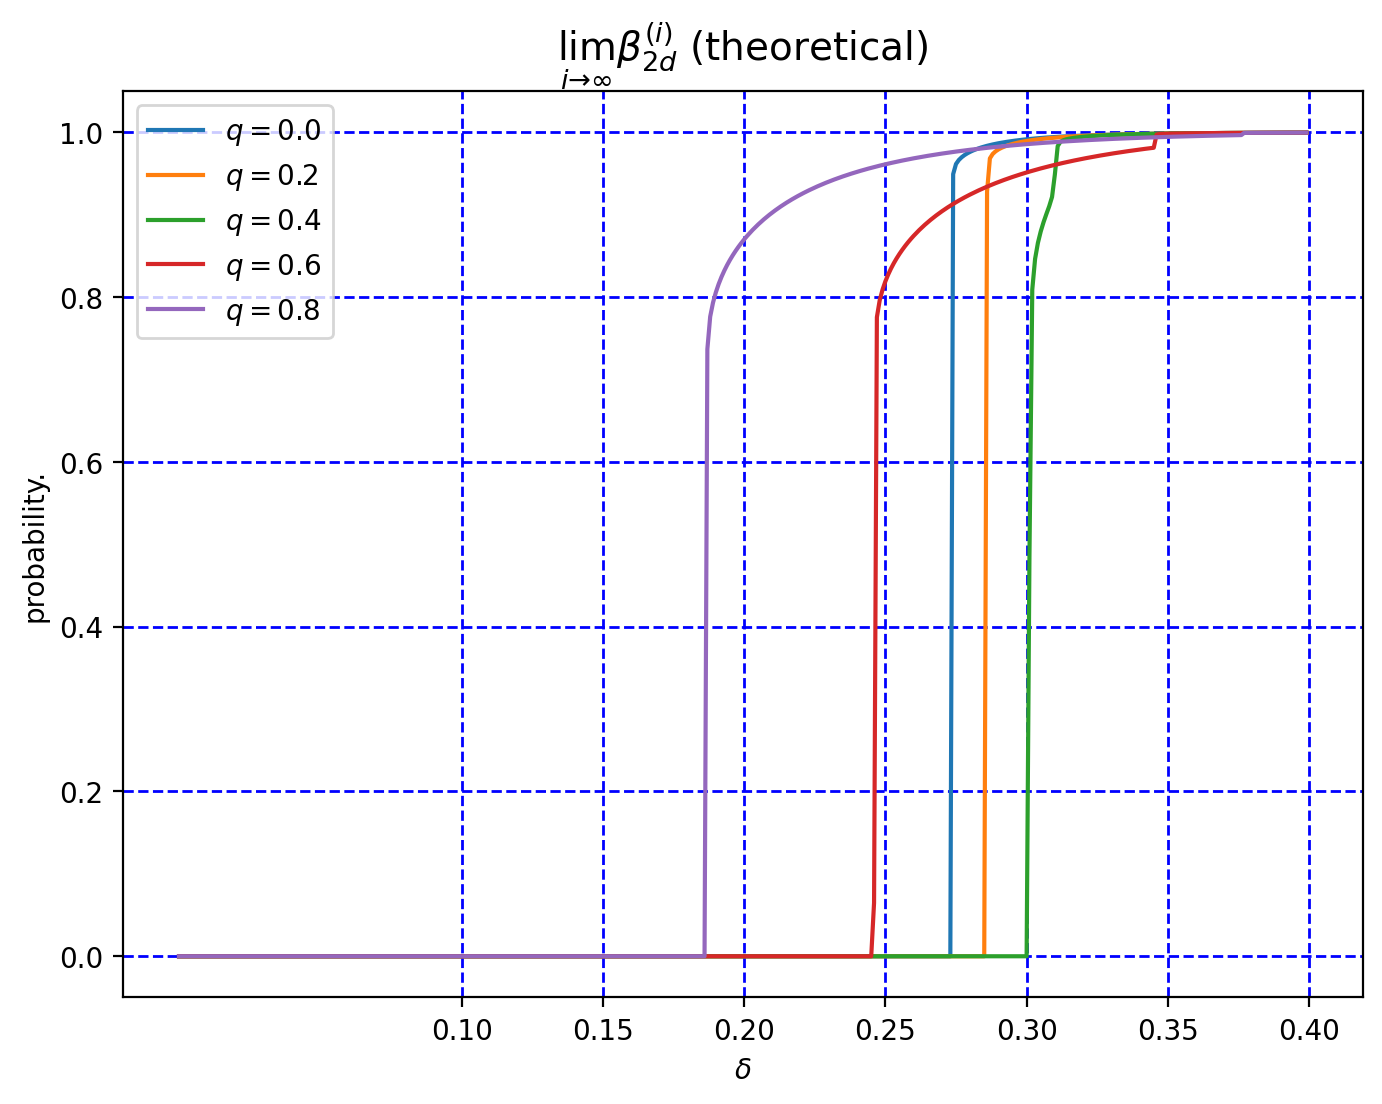

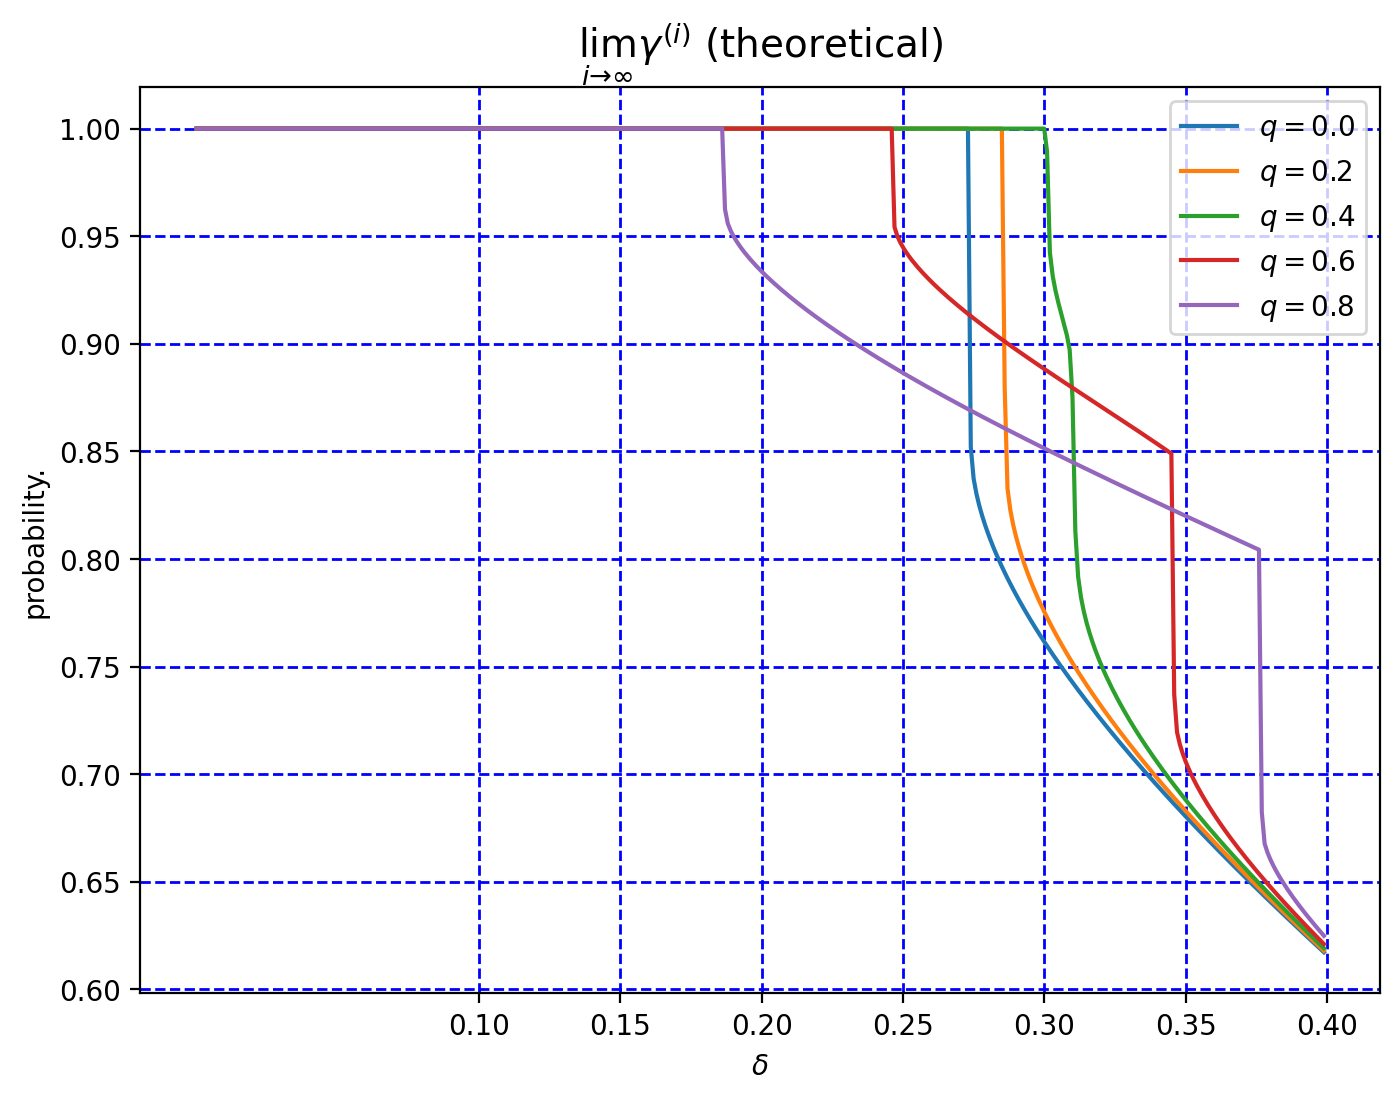

In [8]:
for m, m_str, m_latex in zip(metrics, metrics_str, metrics_LaTeX):
    fig = plt.figure(figsize=(8,6), dpi=200)

    plt.xticks(deltas_tick) # 設定刻度
    plt.grid(color = 'blue', linestyle = '--', linewidth = 1) # 設定網格
    plt.title(m_latex + ' (theoretical)', fontsize = 14) # 標題
    plt.xlabel(r'$\delta$') # x軸標題
    plt.ylabel("probability.") # y軸標題

    colormap = plt.cm.gist_ncar # 顏色輪流出現
    
    lines = []
    for data, qs in zip(m, q_str):
        line = plt.plot(deltas, data, '-')
        lines.append(r'$q=$' + qs)
    plt.legend(lines)
    
    plt.savefig(m_str + '_theoretical.png')
    plt.show()